In [1]:

import numpy as np



In [2]:
# nx, ny, nz = 70,70,70  
# dx, dy, dz = [18735/nx, 20808/ny, 8500/nz]
# x0, y0, z0 = 1062953, 733481, -3500

# hx = [(dx, nx)]
# hy = [(dy, ny)]
# hz = [(dz, nz)]
# mesh = TensorMesh([hx, hy, hz], origin=[x0, y0,z0])

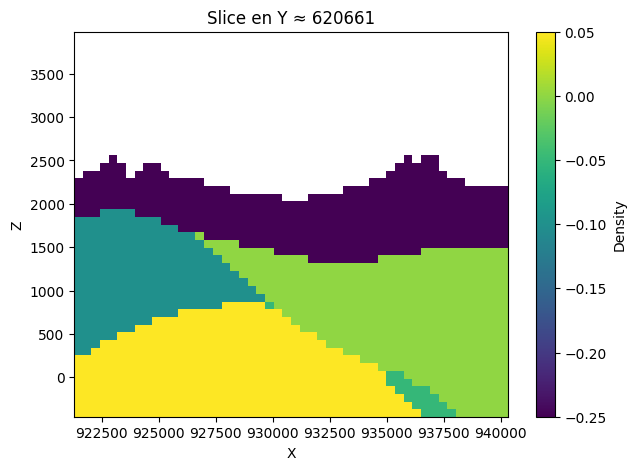

In [11]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("grav_modelD.npz")
model = model_npz["Grav_model"]         # (N,)
centers = model_npz["cell_centers"]    # (N, 3)

# Recuperar dimensiones
xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)

# Volumen con el mismo orden de aplanado (z, y, x) y order='F'
vol = model.reshape((nz, ny, nx), order="F")  # shape (70,70,70)

# Índice de Y más cercano a 2,046,000
target_y = 2046000
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]

# Corte Z–X en esa Y
slice_y = vol[:, y_idx, :]  # z (filas) x x (columnas)

plt.figure(figsize=(7,5))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto"
)
plt.colorbar(im, label="Density")
plt.title(f"Slice en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()


## This model is of the Azufeal Geothermal Area and was created within the framework of project 8091 through the digitization of geological cross-sections in the Gempy library. The geological cross-sections were extracted from the study by Gutiérrez, 2020, and represent shallow volcanic layers resulting from volcanic events, a volcanic structures and bodies which represents hidrothermal alteration area and sell layer. It has dimensions of X=20000 m, Y=19000 m, and Z=6000 m

In [ ]:
# model.shape
centers.shape

(125000, 3)